# Laborator 1 - Analiza exploratorie a datelor (EDA)
Mihai Trăscău (2023)

Scopul acestui laborator este de a deprinde câteva din tehnicile de explorare a un set de date. Metodele de analiză pe care le veți folosi vă ajută spre a descoperi particularități și probleme ale setului de date, cum ar fi:
* Înțelegerea compoziției setului de date (atribute, valori și exemple)
* Realizarea unor statistici (simple) la nivelul setului de date
* Descoperirea și tratarea datelor eronate sau lipsă
* Vizualizarea datelor (pentru o mai bună înțelegere)
* Calculul corelațiilor între atribute

Toate acestea vă ajută să vă asigurați că veți avea un set de date utilizabil și să puteți lua o decizie cât mai informată referitoare la modelele de învățare pe care le veți utiliza.

## Bibliotecile Numpy și Pandas
Cele mai populare biblioteci (oferite sub formă de pachete) din Python pentru a realiza astfel de analize sunt [Numpy](https://numpy.org/doc/stable/) și [Pandas](https://pandas.pydata.org/docs/reference/index.html). Numpy servește ca model de bază pentru matricele multidimensionale cu care veți lucra, în timp ce Pandas pune la dispoziție o suită întreagă de metode de analiză și vizualizare a datelor. Majoritatea funcțiilor pe care le veți utiliza în acest laborator sunt din biblioteca _pandas_. Suplimentar, veți folosi și funcții de vizualizare (mai avansate) din biblioteca Matplotlib sau din [Seaborn](https://seaborn.pydata.org/tutorial/introduction) (strâns legată de _pandas_).

## Setul de date
Veți lucra cu setul de date [Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+disease) din colecția UCI. Acesta conține informații despre pacienți care suferă (sau nu) de boli de inimă. Atributele din setul de date sunt, în ordine:
1. _age_ - vârstă
2. _sex_ - sexul biologic al pacientului (1 pentru bărbat și 0 pentru femeie)
3. _cp_  - tipul durerii în piept
4. _trestbps_ - tensiunea arterială la repaos (în mm/Hg)
5. _chol_ - colesterol seric (în mg/dl)
6. _fbs_ - glicemie peste 120 md/dl
7. _restecg_ - rezultate electrocardiograma
8. _thalach_ - puls maxim
9. _exang_ - dureri induse de exerciții (1 pentru da, 0 pentru nu)
10. _oldpeak_ - diferența ECG din testul de stres față de repaos
11. _slope_ - panta ECG în testul de stres
12. _ca_ - numărul de vase majore colorate prin fluoroscopie
13. _thal_ - tip de thalassemie (boală de sânge)
14. _target_ - diagnostic de severitate a îngustării a vaselor de sânge

In [1]:
# Încărcăm pachetele necesare

# Structuri de date și unelte de analiză
import numpy as np
import pandas as pd

# Vizualizare
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
# Descărcăm setul de date
data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
dataset = pd.read_csv(data_link)

---
#### Cerința 1 [0p]
Afisați primele 5 exemple din setul de date pentru a le inspecta
_(HINT: folosiți variabila **dataset** de mai sus și metode din pandas)_.

In [3]:
# TODO 1
dataset.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


---
#### Cerința 2 [0.5p]
Observând problema legată de coloane, rescrieți numele acestora pentru a fi ușor de lucrat cu acestea în continuare. Afișați apoi, din nou, primele 5 exemple.

In [4]:
# TODO 2
dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


---
#### Cerința 3 [0p]
Găsiți numărul de exemple din setul de date.

In [5]:
# TODO 3
print(f"The number of the dataset{len(dataset)}")
print(f"Dataset Shape {dataset.shape}")

The number of the dataset302
Dataset Shape (302, 14)


---
#### Cerința 4  [0.5p]
Găsiți, pentru fiecare atribut în parte, următoarele metrici de interes:
* numărul de exemple care nu au valori lipsă
* valoarea medie
* deviația standard a valorilor
* valoarea minimă
* valoarea quantilei 25% (valoarea sub care se găsesc 25% din exemple)
* valoarea quantilei 50% (valoarea sub care se găsesc 50% din exemple)
* valoarea quantilei 75% (valoarea sub care se găsesc 75% din exemple)
* valoarea maximă

_(HINT: Este de ajuns să utilizați o singură metodă din pandas)_

In [6]:
# TODO 4
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


---
#### Cerința 5 [0.5p]
Afișați informații legate de tipul de date și numărul de exemple cu valori nenule pentu fiecare atribut în parte.

In [7]:
# TODO 5
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


---
#### Cerința 6 [0.5p]
Verificați pentru fiecare atribut în parte câte exemple au valori nule (NaN).

In [8]:
# TODO 6
print(f"Missing Value per column{dataset.isnull().sum()}")

Missing Value per columnage         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


---
#### Cerința 7 [1p]
Descoperiți care atribute conțin și alte simboluri în afară de valori numerice și afișați exemplele în cauză prin concatenarea lor într-un singur _DataFrame_ din _pandas_ (care să NU conțină duplicate).

_(HINT: Dacă ați rezolvat Cerința 5 vedeți ușor care sunt atributele căutate)._

In [9]:
# TODO 7
non_numeric_example = []
problematic_columns = []
for column in dataset.columns:
    numeric_column = pd.to_numeric(dataset[column], errors='coerce') # coerce
    is_non_numeric = numeric_column.isna() & dataset[column].notna()
    if is_non_numeric.any():
        print(f"Column {column} has non-numeric value")
        problematic_rows = dataset[is_non_numeric]
        non_numeric_example.append(problematic_rows)
        problematic_columns.append(column)
        print(problematic_rows)
        print(problematic_rows[column].value_counts())

if non_numeric_example:
    all_problematic =  pd.concat(non_numeric_example).drop_duplicates()
    print("\nAll unique examples with non-numeric values:")
    print(all_problematic)
else:
    print("\nNo non-numeric values found ")


Column ca has non-numeric value
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
165  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
191  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
286  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope ca thal  target  
165    1.0  ?  3.0       0  
191    2.0  ?  7.0       1  
286    2.0  ?  7.0       0  
301    1.0  ?  3.0       0  
ca
?    4
Name: count, dtype: int64
Column thal has non-numeric value
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
86   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
265  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   

     slope   ca thal  target  
86     1.0  0.0    ?       0  
265    2.0  0.0    ?       2  
thal
?    2
Name: count, d

---
#### Cerința 8  [1p]
Tratarea valorilor lipsă sau necunoscute din setul de date este importantă din perspectiva aplicării ulterioare a metodelor de învățare. Astfel, înlocuiți simbolurile non-numerice descoperite la pasul trecut cu valoarea cea mai frecventă pentru atributul respectiv.

In [10]:
# TODO 8
for column in problematic_columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')
    mode_value = dataset[column].mode()[0]

    dataset[column].fillna(mode_value , inplace=True)

    dataset[column].astype(float).astype(int)

print(f"After cleaning\n{dataset.info()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.2 KB
After cleaning
None


/var/folders/f_/q8v4mlrs1x1b151q57hmg8d40000gn/T/ipykernel_3549/3751811743.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(mode_value , inplace=True)
/var/folders/f_/q8v4mlrs1x1b151q57hmg8d40000gn/T/ipykernel_3549/3751811743.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

#### Cerința 9 [0.5p]
Histogramele reprezintă modalități de vizualiza distribuția (frecvența) de valori ale atributelor din setul de date. Atributele  continue sunt discretizate (în „bins”) înainte de a fi afișate.

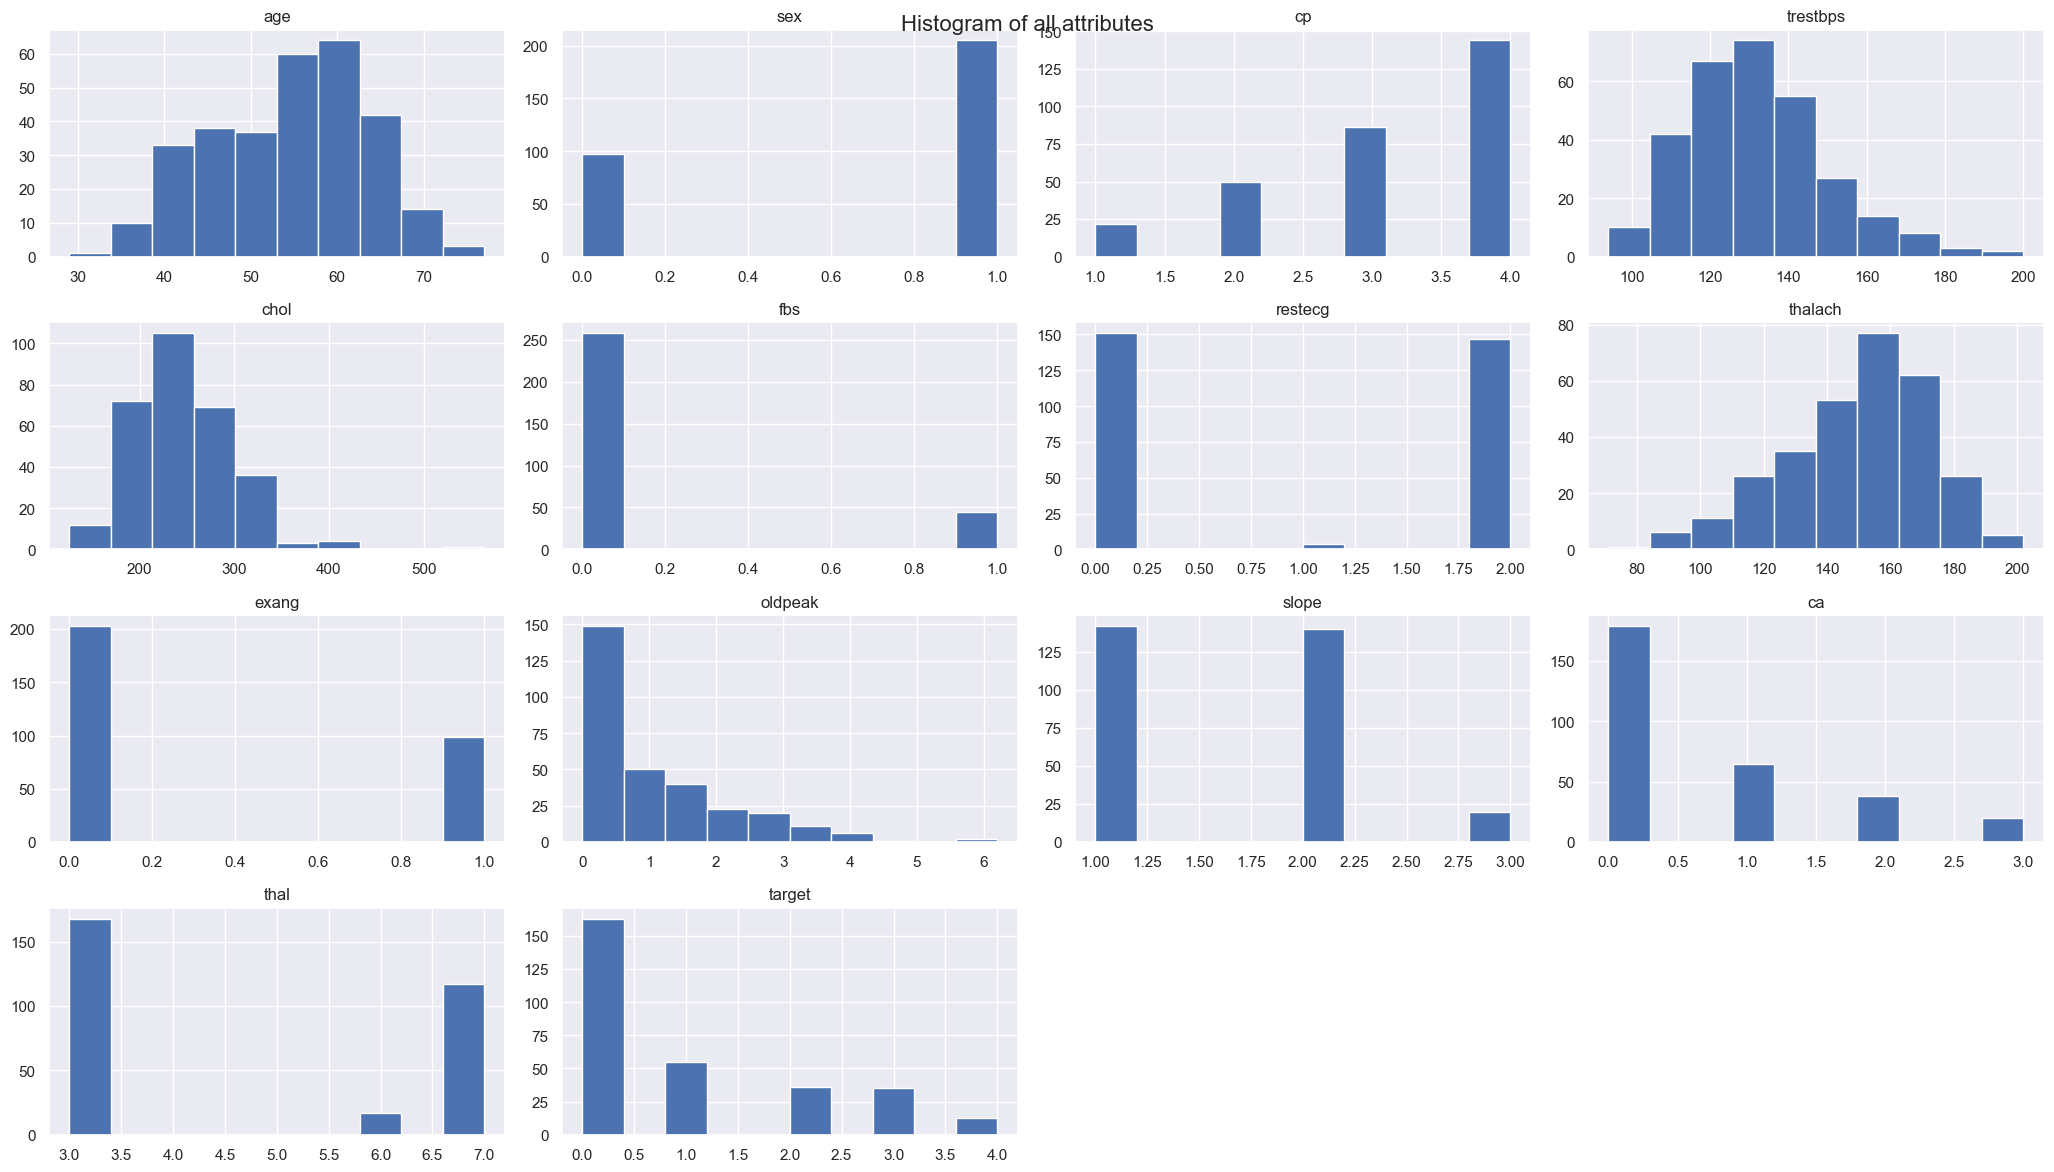

In [11]:
sns.set_theme(rc={'figure.figsize':(20.7,12.27)})
# TODO 9

dataset.hist(figsize=(20.7,12.27))
plt.suptitle("Histogram of all attributes",y=0.95, fontsize=16)
plt.tight_layout()
plt.show()


---
#### Cerința 10  [1p]
Plotați histograma atributului _age_ pentru următoarele intervale: 0-18, 18-35, 35-45, 45-55, 55-65 și 65+.

_(HINT: Fixați și parametrul width pentru histogramă pentru afișare mai plăcută)_

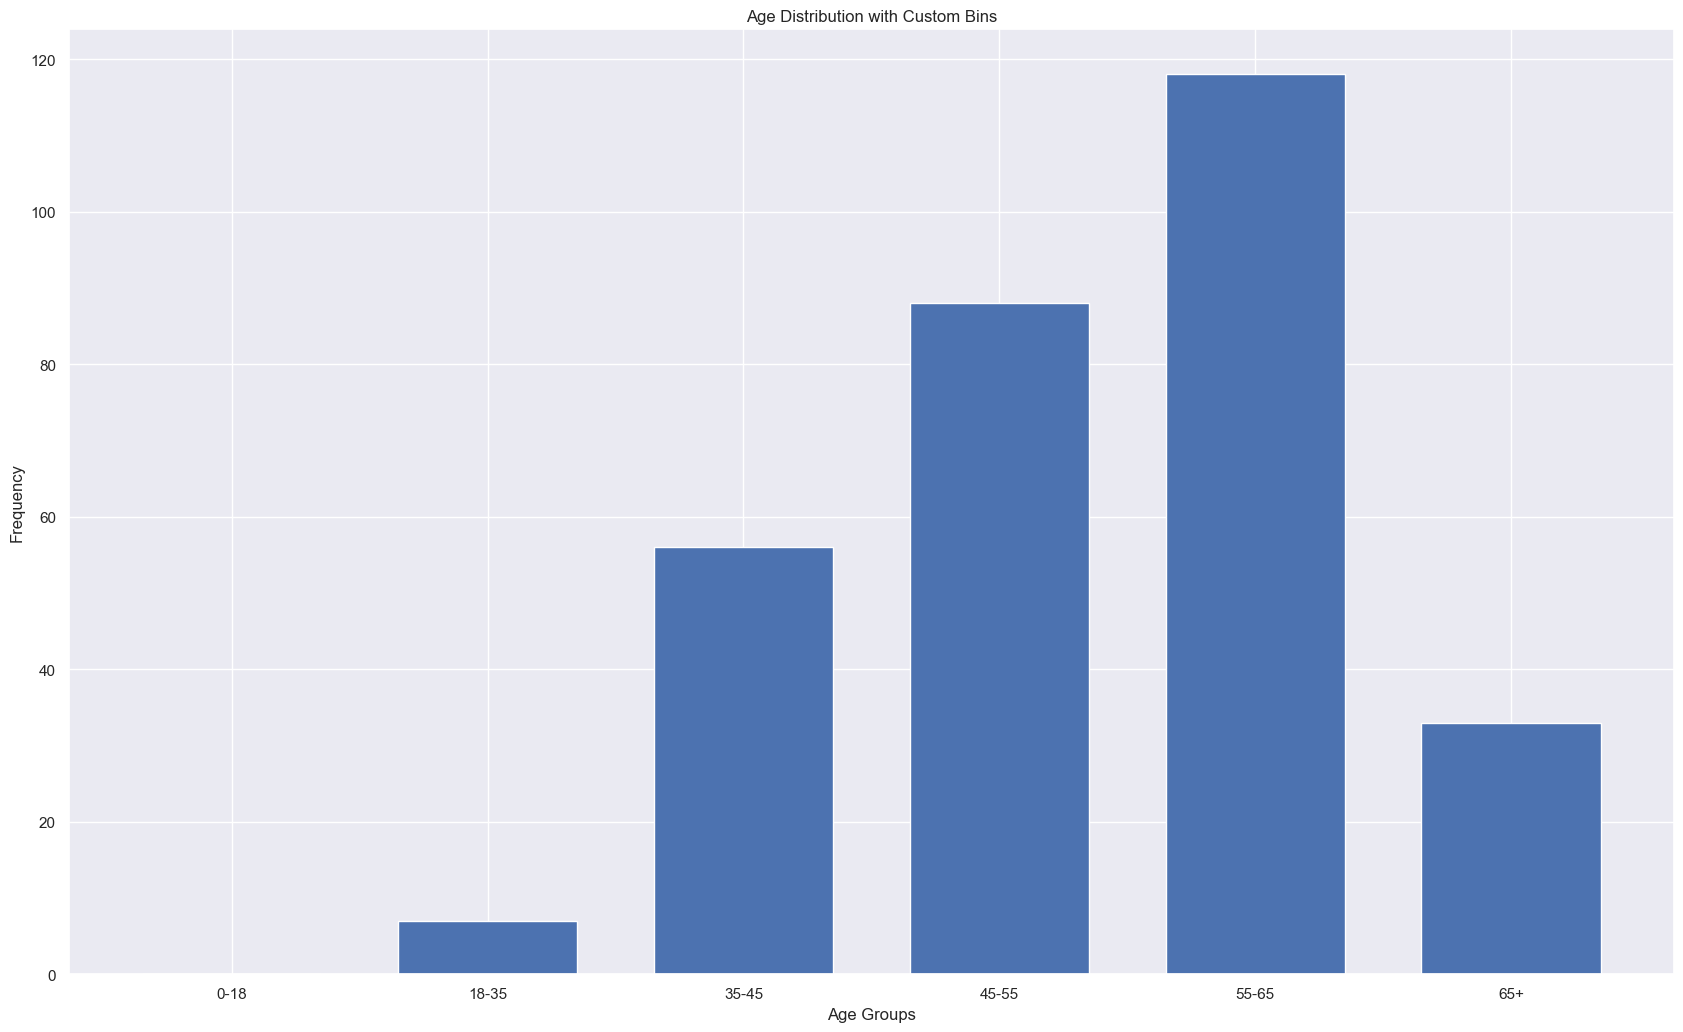

In [12]:
# TODO 10
age_bins = [0, 18, 35, 45, 55, 65, 100]
age_labels = ['0-18', '18-35', '35-45', '45-55', '55-65', '65+']
dataset["age_group"] = pd.cut(dataset['age'],bins=age_bins, labels=age_labels)

plt.figure(figsize=(20.7,12.27))
age_counts=dataset['age_group'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts, width=0.7)
plt.title('Age Distribution with Custom Bins')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()



---
#### Cerința 11  [1p]
Plotați histograma atributului _target_ grupată după sexul pacienților. Păstrați aceeași amplitudine pe axa frecvenței pentru graficele obținute.

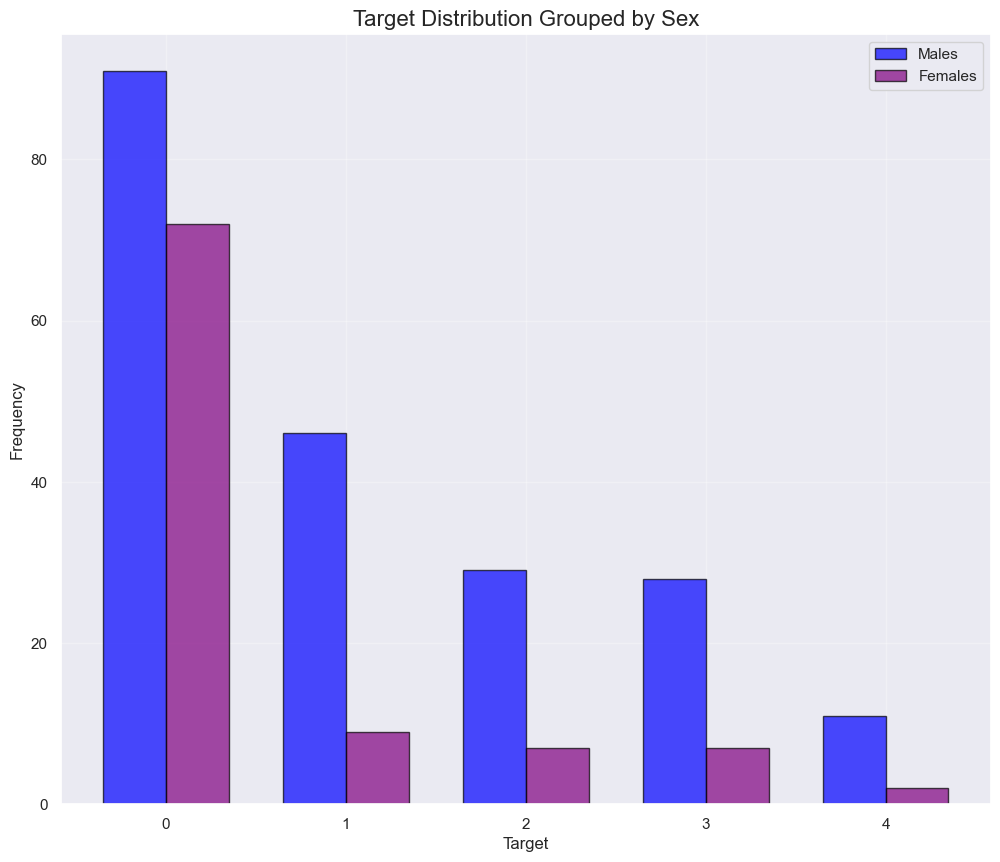

In [13]:
# TODO 11
plt.figure(figsize=(12, 10))

# Get value counts for each group
male_counts = dataset[dataset['sex'] == 1]['target'].value_counts().sort_index()
female_counts = dataset[dataset['sex'] == 0]['target'].value_counts().sort_index()

# Set up the bar positions
x = np.arange(len(male_counts))
width = 0.35

# Create grouped bars
plt.bar(x - width/2, male_counts.values, width, label='Males', color='blue', alpha=0.7, edgecolor='black')
plt.bar(x + width/2, female_counts.values, width, label='Females', color='purple', alpha=0.7, edgecolor='black')

plt.title('Target Distribution Grouped by Sex', fontsize=16)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(x, male_counts.index)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---
#### Cerința 12  [1p]
Setul nostru de date conține exemple din 5 clase de severitate a diagnosticului, însă pe noi ne interesează doar să cunoaștem dacă diagnosticul este pozitiv sau negativ. Transformați atributul _target_ într-unul binar prin remaparea tuturor valorilor non-zero la valoarea _1_. Afișați apoi histograma pentru atributul astfel modificat.

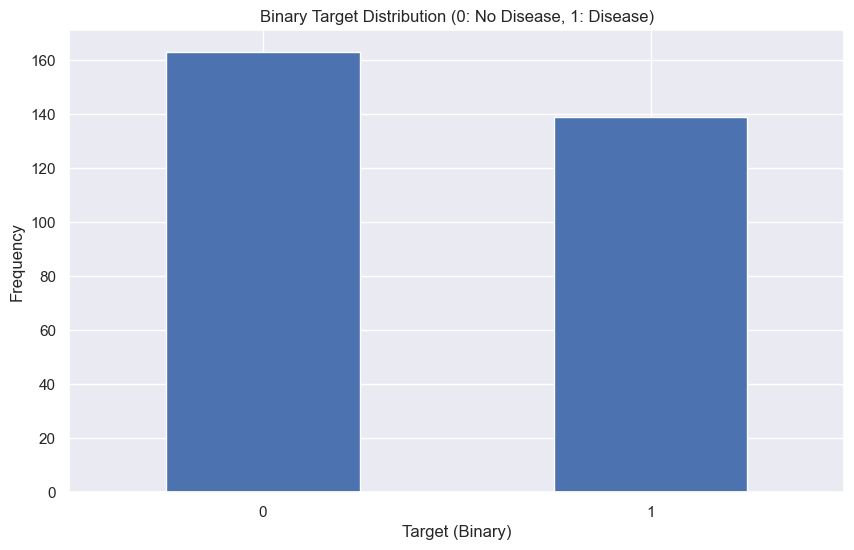

Binary target value counts:
target_binary
0    163
1    139
Name: count, dtype: int64


In [14]:
# TODO 12
#copy of the data_set
dataset_binary = dataset.copy()

# 0 = no disease, 1 = disease
dataset_binary['target_binary'] = (dataset_binary['target'] > 0).astype(int)

# Plot histogram
plt.figure(figsize=(10, 6))
dataset_binary['target_binary'].value_counts().plot(kind='bar')
plt.title('Binary Target Distribution (0: No Disease, 1: Disease)')
plt.xlabel('Target (Binary)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

print("Binary target value counts:")
print(dataset_binary['target_binary'].value_counts())

---
#### Cerința 13 [0.5p]
Corelațiile descriu relații între perechi variabile indicând conform valorilor acestora:
* dacă o variabilă crește, cealaltă crește și ea (valoare de corelație pozitivă, spre 1)
* dacă o variabilă crește, cealaltă scade (valoare de corelație negativă, spre -1)
* cele două variabile nu sunt suficient (sau deloc) corelate (valoare de corelație apropiată de 0)

Calculați folosind metode din _pandas_ valorile acestor corelații (Pearson). Valorile vor fi apoi afișate folosind o hartă cu temperatură (heatmap) folosind _seaborn_.


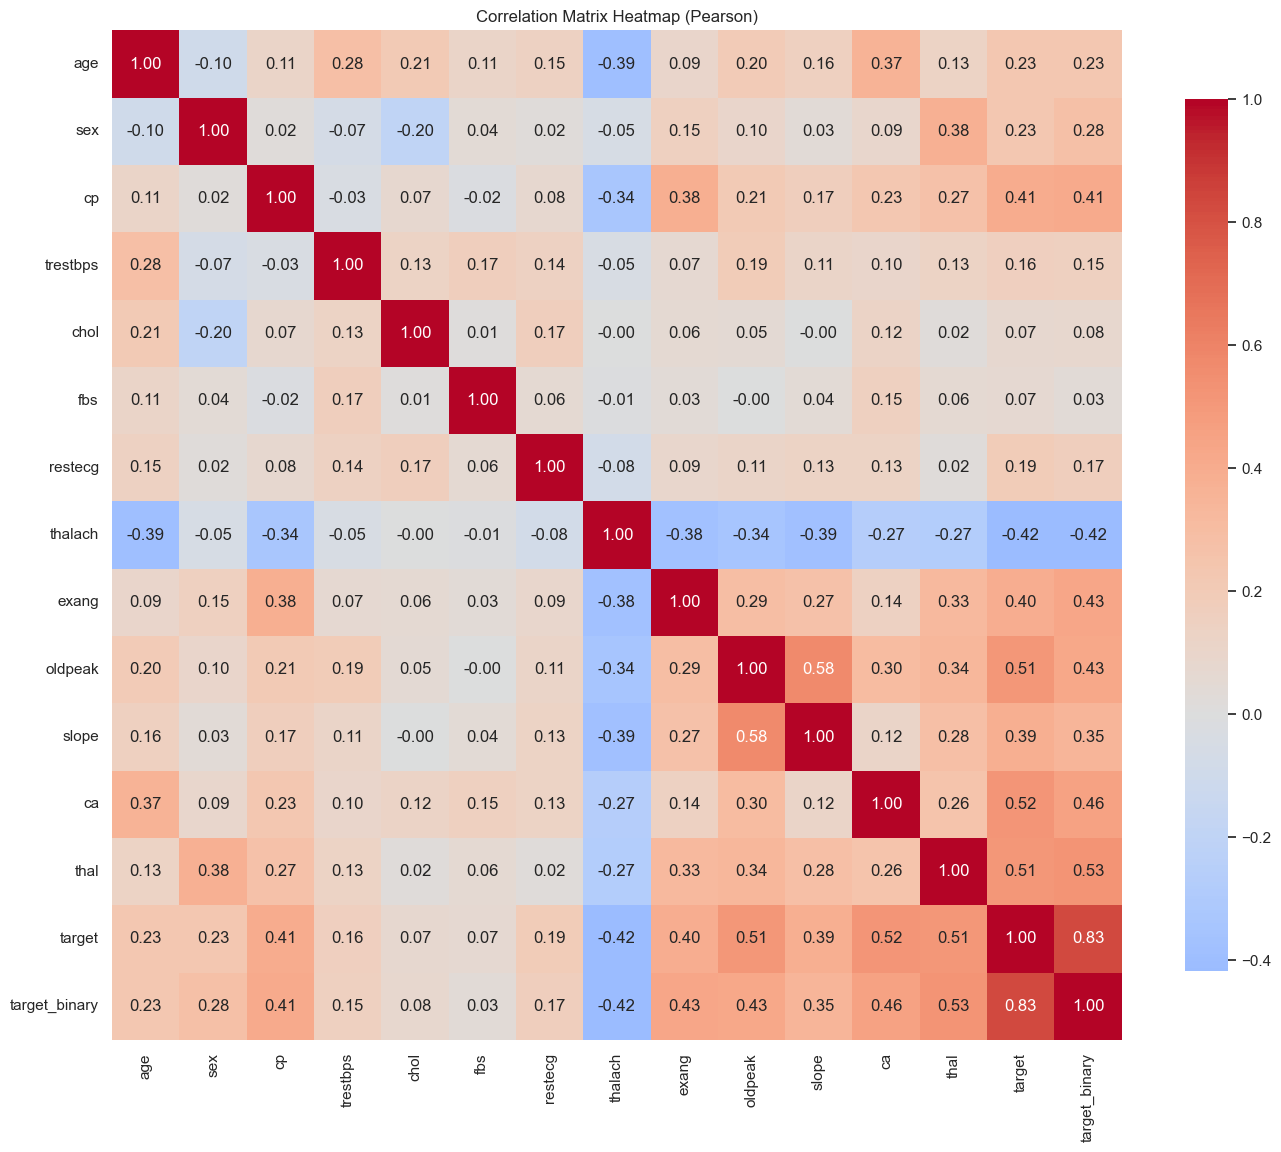

In [15]:
# TODO 13
# TODO 13
# Drop the non-numeric 'age_group' column before calculating correlation
#correlation_matrix = dataset.corr(method='pearson')
correlation_matrix = dataset_binary .drop('age_group', axis=1).corr(method='pearson')
# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap (Pearson)')
plt.tight_layout()
plt.show()

#### Cerința 14  [1p]
Extrageți și afișați top-3 atribute puternic corelate cu ținta. Apoi, extrageți și afișați top-3 atribute cele mai puțin corelate cu ținta. Acestea din urmă reprezintă, spre exemplu, candidați buni de atribute ce ar putea fi eliminate dacă am dori un set de date mai „suplu”.

(HINT: Utilizați valoarea absolută a corelației întrucât și corelațiile negative de valori mari absolute sunt considerate „puternice”).

In [16]:
# TODO 14
# Get correlations with target
target_correlations = correlation_matrix['target'].drop('target')

# Get absolute correlations for ranking
abs_correlations = target_correlations.abs()

# Top 3 most correlated attributes
top_3_positive = target_correlations.nlargest(3)
top_3_negative = target_correlations.nsmallest(3)
top_3_absolute = abs_correlations.nlargest(3)
bottom_3_absolute = abs_correlations.nsmallest(3)

print("Top 3 attributes most correlated with target:")
print(top_3_positive)
print("\nTop 3 attributes most negatively correlated with target:")
print(top_3_negative)
print("\nTop 3 attributes most strongly correlated with target (absolute value):")
print(top_3_absolute)
print("\nTop 3 attributes least correlated with target (absolute value):")
print(bottom_3_absolute)

Top 3 attributes most correlated with target:
target_binary    0.829718
ca               0.520107
thal             0.509685
Name: target, dtype: float64

Top 3 attributes most negatively correlated with target:
thalach   -0.415399
fbs        0.065937
chol       0.070315
Name: target, dtype: float64

Top 3 attributes most strongly correlated with target (absolute value):
target_binary    0.829718
ca               0.520107
thal             0.509685
Name: target, dtype: float64

Top 3 attributes least correlated with target (absolute value):
fbs         0.065937
chol        0.070315
trestbps    0.159978
Name: target, dtype: float64


---
#### Cerința 15  [0.5p]
Folosind _seaborn_ plotați un grafic compus care să descrie modul în care fiecare dintre perechile de atribute din setul de date variază una față de cealaltă. Practic, pentru fiecare astfel de pereche pe o axă vom regăsi valorile primului atribut iar pe celalaltă valorile celui de-al doilea.

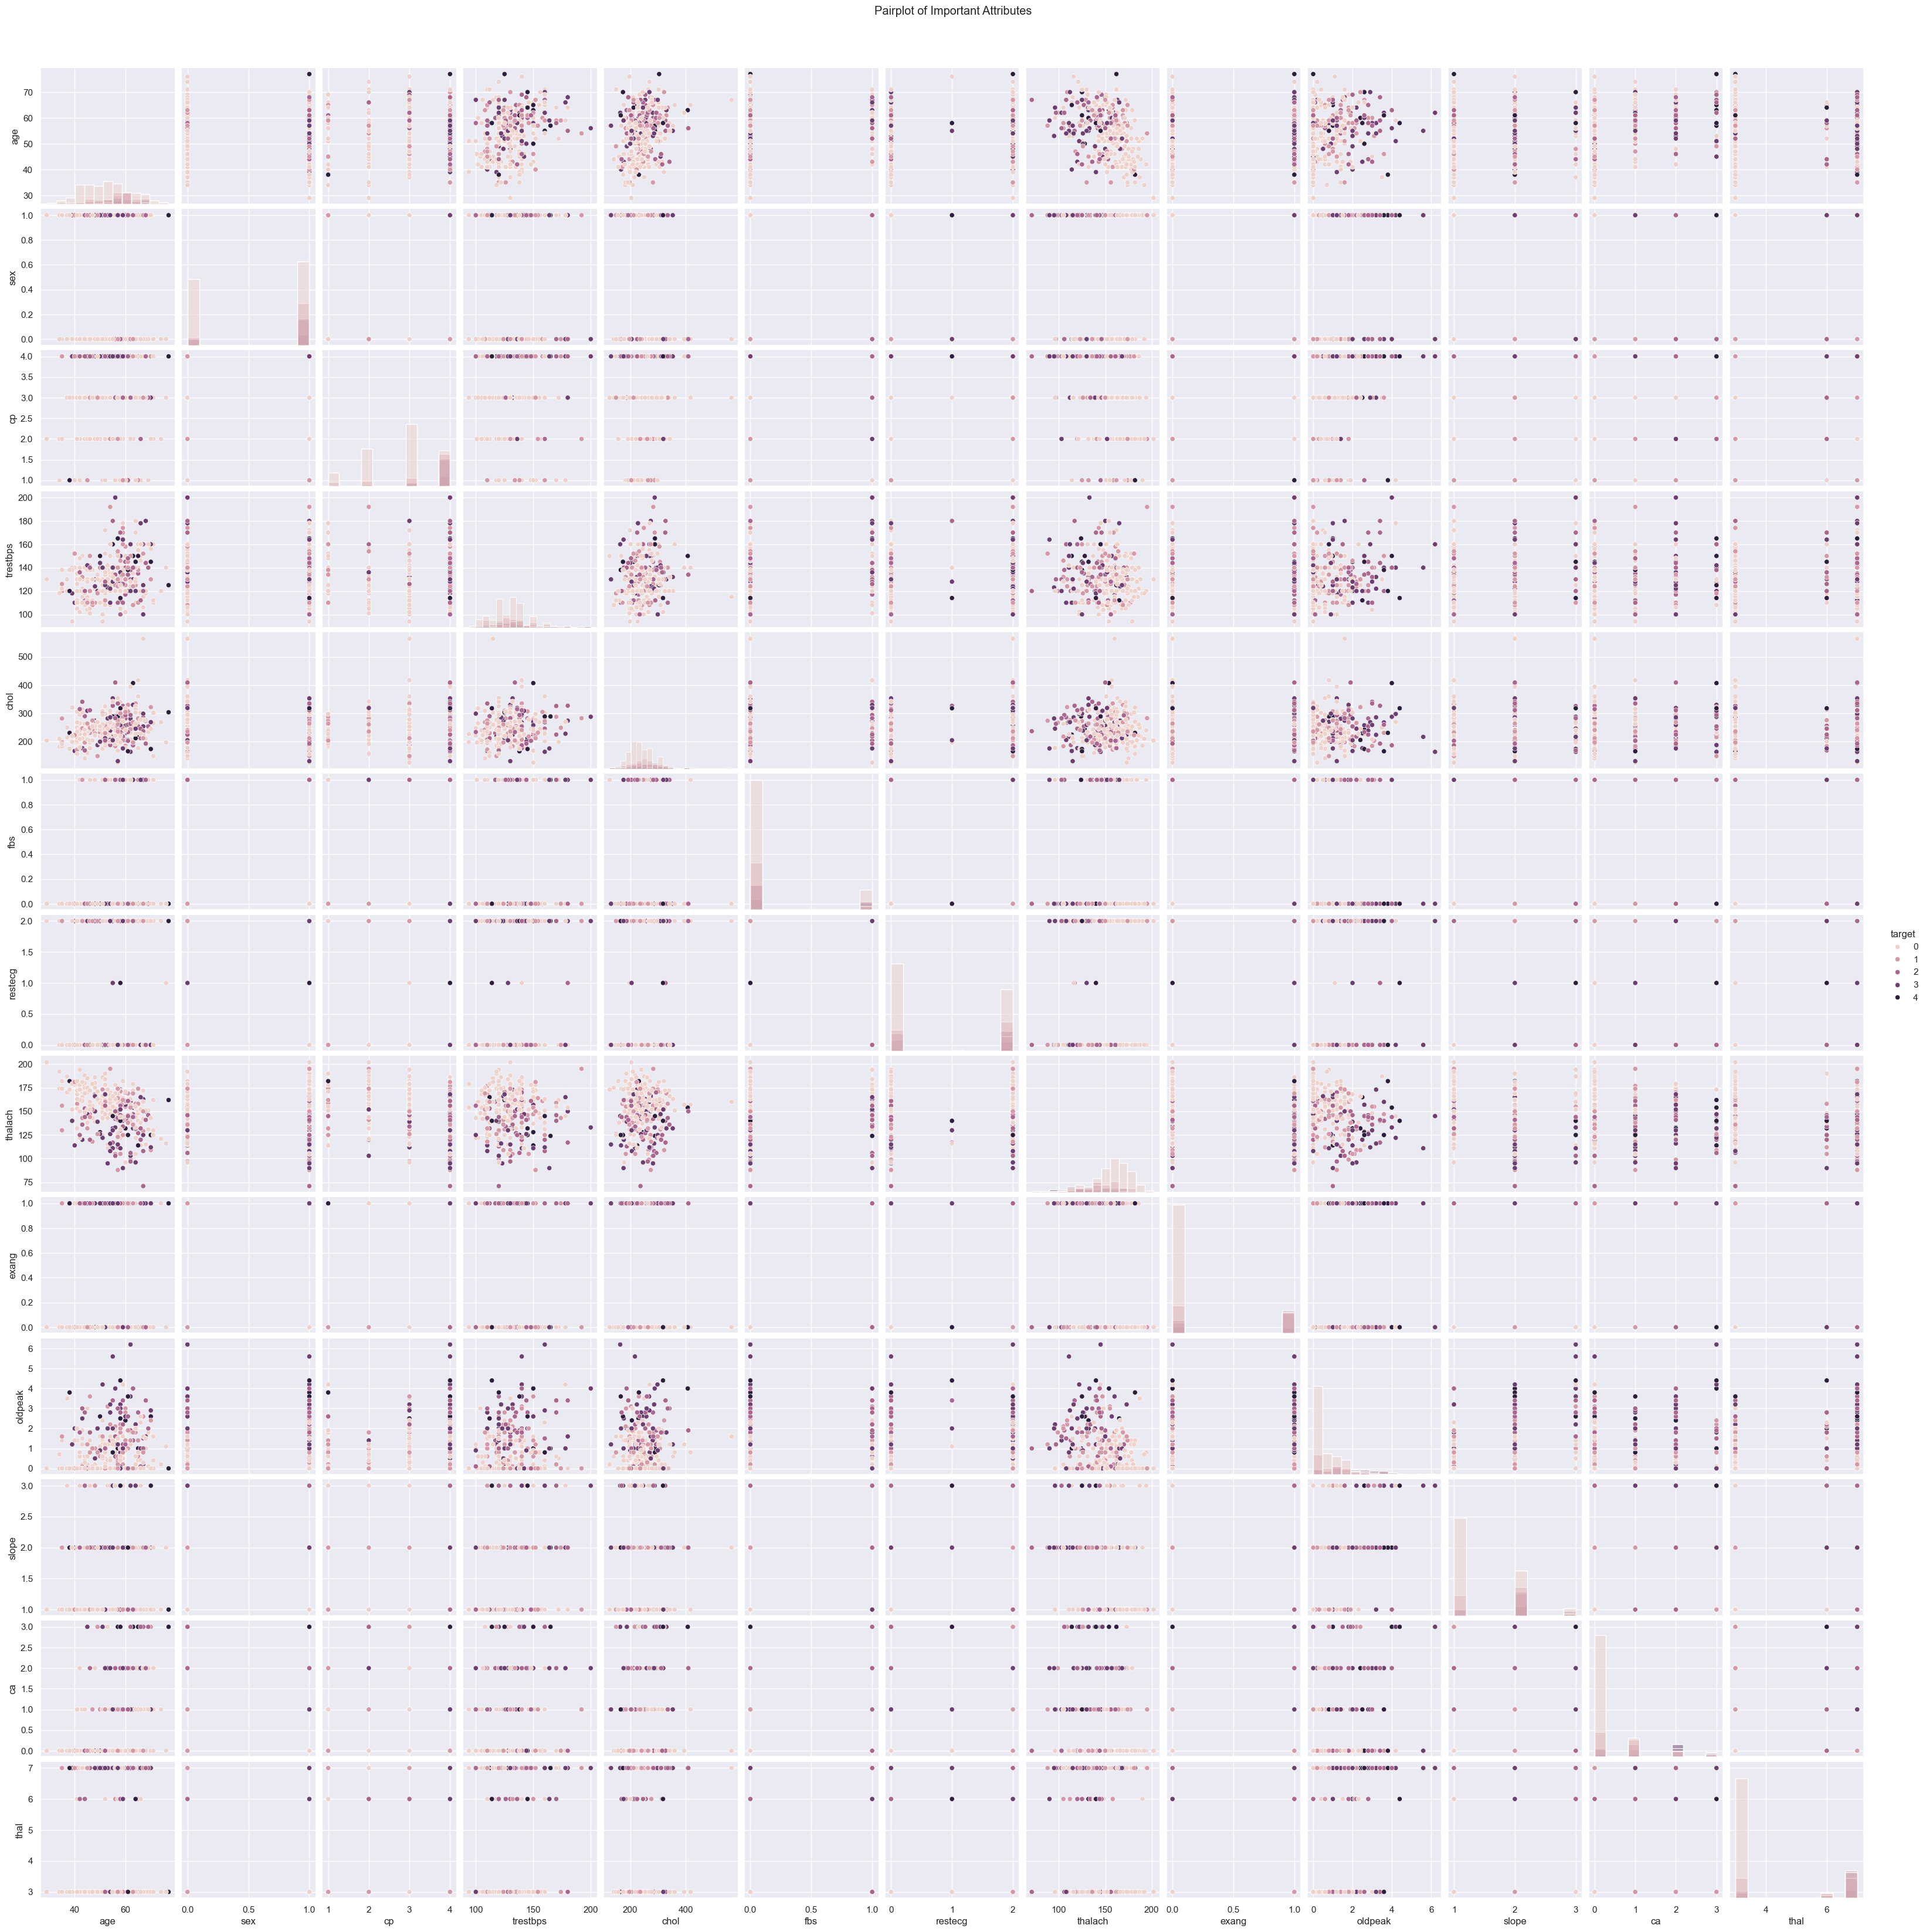

In [17]:
# TODO 15
sns.pairplot(dataset, hue='target', diag_kind='hist')
plt.suptitle('Pairplot of Important Attributes', y=1.02)
plt.show()

---
#### Cerința 16 [0.5p]
Boxplot este un tip de grafic care ne permite să vizualizăm rapid care sunt valorile pentru medie, minim, maxim, percentilele 25% și 75% precum și valorile _outlier_ (cu o deviație de la medie mai mare de 3 deviații standard).

Realizați un boxplot pentru coloanele _trestbps, chol și thalach_. Explicați pe grafic cum sunt afișate toate valorile descrise mai sus.

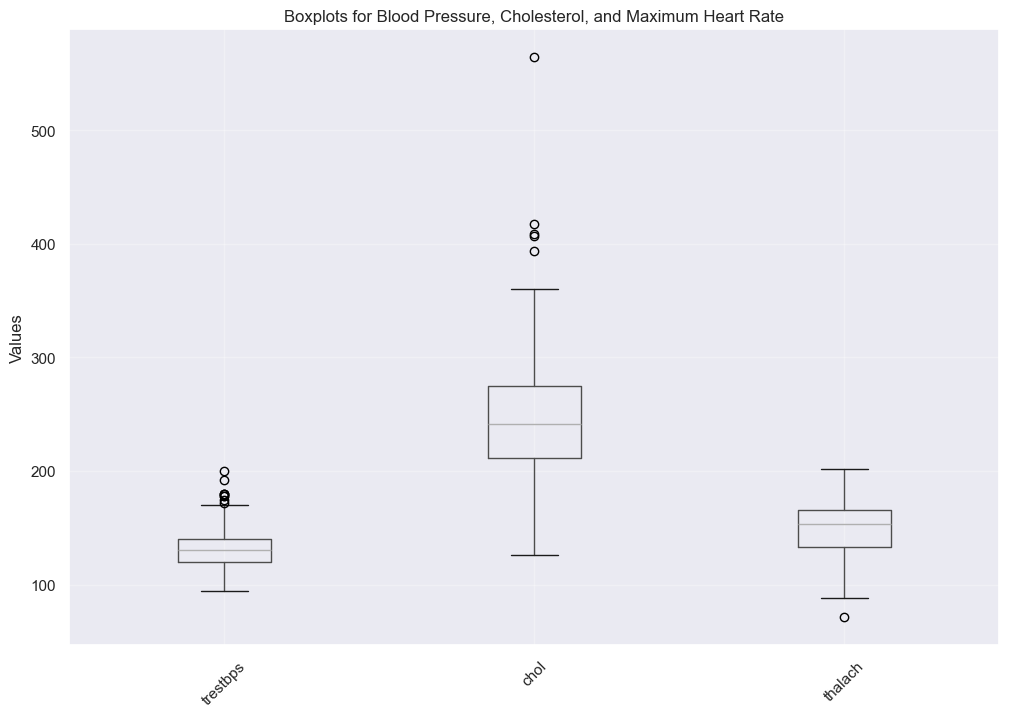


BOXPLOT EXPLANATION:
• The box represents the interquartile range (IQR) from Q1 (25%) to Q3 (75%)
• The line inside the box is the median (Q2, 50%)
• The whiskers extend to 1.5 * IQR from the quartiles
• Points outside the whiskers are considered outliers
• The box shows where 50% of the data lies


In [18]:
# TODO 16
boxplot_columns = ['trestbps', 'chol', 'thalach']

plt.figure(figsize=(12, 8))
dataset[boxplot_columns].boxplot()
plt.title('Boxplots for Blood Pressure, Cholesterol, and Maximum Heart Rate')

plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Explanation of boxplot components
print("\nBOXPLOT EXPLANATION:")
print("• The box represents the interquartile range (IQR) from Q1 (25%) to Q3 (75%)")
print("• The line inside the box is the median (Q2, 50%)")
print("• The whiskers extend to 1.5 * IQR from the quartiles")
print("• Points outside the whiskers are considered outliers")
print("• The box shows where 50% of the data lies")